In [ ]:
# imports 
# always run this cell

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time 



In [ ]:
# import the MNIST dataset

(Xtrain, ytrain), (xtest, ytest) = mnist.load_data()

Xtrain = Xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

# hold 20% of trainining data as validation set
xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42) 

num_classes = 10

# we need to one hot encoding the target values, to help the training process of neural network
# we will use cross entropy loss function so we must represent the target values as one hot encoding vectors according to keras documentation
ytrain_onehot = keras.utils.to_categorical(ytrain,num_classes)
yvalid_onehot = keras.utils.to_categorical(yvalid,num_classes)


In [ ]:
# train with different batch sizes


 # train the model

epochs = 100
Ntrain = Xtrain.shape[0] # size of initial train set
batch_size = [1, 256, Ntrain]
times = [] # store fit time in every case

for i in range(0,len(batch_size)):
  # define the model
  model1 = Sequential()
  model1.add(Flatten(input_shape=(28, 28)))
  model1.add(Dense(128, activation='relu')) # hidden layer 1 fully connected
  model1.add(Dense(256, activation='relu')) # hidden layer 2 fully connected
  model1.add(Dense(10, activation='softmax')) # output layer
  model1.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
  start = time.time() # start time
  history1 = model1.fit(xtrain,ytrain_onehot, batch_size = batch_size[i], epochs = epochs, validation_data = (Xvalid,yvalid_onehot)) 
  times.append((time.time()-start)) # append training time
  plt.figure() 
  plt.title('Classification Accuracy')
  plt.plot(history1.history['val_accuracy'],color='orange',label='validation')
  plt.plot(history1.history['accuracy'],color='blue',label='train')
  plt.legend(['val_accuracy', 'accuracy'])
  plt.figure()
  plt.title('Loss')
  plt.plot(history1.history['val_loss'],color='orange',label='validation')
  plt.plot(history1.history['loss'],color='blue',label='train')
  plt.legend(['val_loss', 'loss'])
time_sec = dict({'Time (sec) for online training ' : times[0], 'Time (sec) for minibatch = 256 training ' : times[1], 'Time (sec) for batch training ' : times[2]})
print(time_sec)

In [ ]:
# train with RMSprop optimizer with different rho = {0.01, 0.99}

rho = [0.01, 0.99]

for r in rho: 
  # define the model
  model2 = Sequential()
  model2.add(Flatten(input_shape=(28, 28)))
  model2.add(Dense(128, activation='relu')) # hidden layer 1 fully connected
  model2.add(Dense(256, activation='relu')) # hidden layer 2 fully connected
  model2.add(Dense(10, activation='softmax')) # output layer
  opt = keras.optimizers.RMSprop(learning_rate=0.001, rho = r)
  model2.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer = opt, metrics=['accuracy'])
  history2 = model2.fit(xtrain,ytrain_onehot, batch_size = 256, epochs = 100, validation_data = (Xvalid,yvalid_onehot)) 
  plt.figure() 
  plt.title('Classification Accuracy')
  plt.plot(history2.history['val_accuracy'],color='orange',label='validation')
  plt.plot(history2.history['accuracy'],color='blue',label='train')
  plt.legend(['val_accuracy', 'accuracy'])
  plt.figure()
  plt.title('Loss')
  plt.plot(history2.history['val_loss'],color='orange',label='validation')
  plt.plot(history2.history['loss'],color='blue',label='train')
  plt.legend(['val_loss', 'loss'])



In [ ]:
# train with SGD optimizer 
# nn have a initialization of weights by a normal distribution with mean = 10


# define the model
model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(128, activation='relu',kernel_initializer=keras.initializers.RandomNormal(mean=10))) # hidden layer 1 fully connected
model3.add(Dense(256, activation='relu',kernel_initializer=keras.initializers.RandomNormal(mean=10))) # hidden layer 2 fully connected
model3.add(Dense(10, activation='softmax',kernel_initializer=keras.initializers.RandomNormal(mean=10))) # output layer
model3.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer = keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
history3 = model3.fit(xtrain,ytrain_onehot, batch_size = 256, epochs = 100, validation_data = (Xvalid,yvalid_onehot)) 
plt.figure() 
plt.title('Classification Accuracy')
plt.plot(history3.history['val_accuracy'],color='orange',label='validation')
plt.plot(history3.history['accuracy'],color='blue',label='train')
plt.legend(['val_accuracy', 'accuracy'])
plt.figure()
plt.title('Loss')
plt.plot(history3.history['loss'],color='blue',label='train')
plt.plot(history3.history['val_loss'],color='orange',label='validation')
plt.legend(['loss', 'val_loss'])

Epoch 1/100
188/188 [==============================] - 2s 10ms/step - loss: 7.1209 - accuracy: 0.7187 - val_loss: 1.4808 - val_accuracy: 0.7901
Epoch 2/100
188/188 [==============================] - 2s 9ms/step - loss: 1.3602 - accuracy: 0.7856 - val_loss: 1.2659 - val_accuracy: 0.8102
Epoch 3/100
188/188 [==============================] - 2s 9ms/step - loss: 1.2165 - accuracy: 0.8045 - val_loss: 1.1445 - val_accuracy: 0.8223
Epoch 4/100
188/188 [==============================] - 2s 10ms/step - loss: 1.1263 - accuracy: 0.8164 - val_loss: 1.0641 - val_accuracy: 0.8282
Epoch 5/100
188/188 [==============================] - 2s 9ms/step - loss: 1.0626 - accuracy: 0.8241 - val_loss: 1.0257 - val_accuracy: 0.8350
Epoch 6/100
188/188 [==============================] - 2s 9ms/step - loss: 1.0093 - accuracy: 0.8314 - val_loss: 0.9800 - val_accuracy: 0.8453
Epoch 7/100
188/188 [==============================] - 2s 9ms/step - loss: 0.9698 - accuracy: 0.8381 - val_loss: 0.9662 - val_accuracy: 0.84

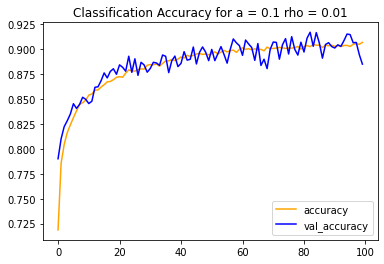

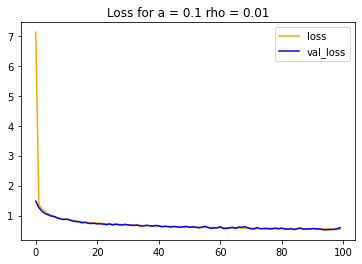

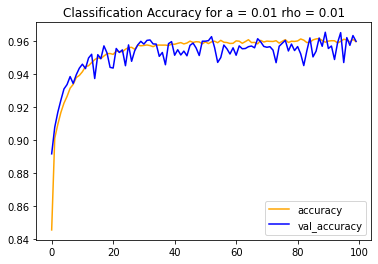

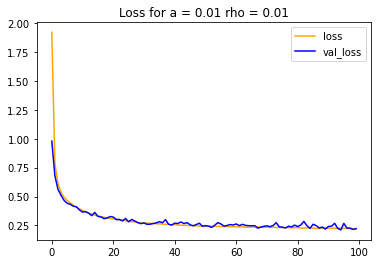

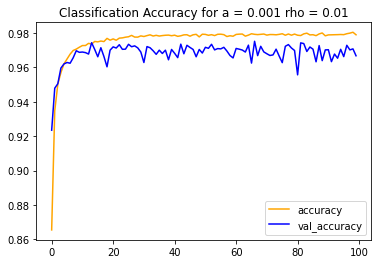

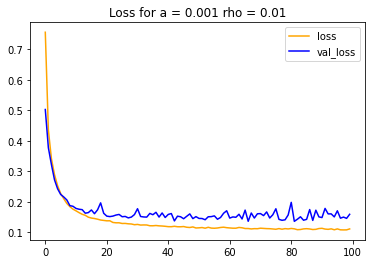

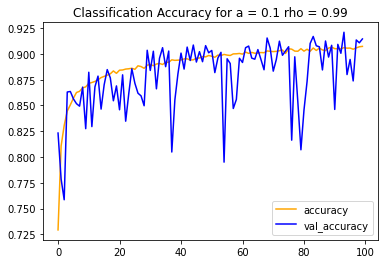

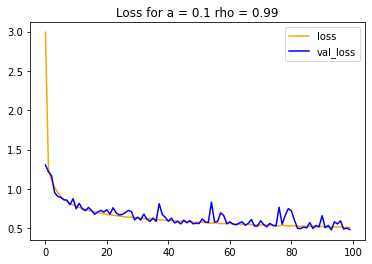

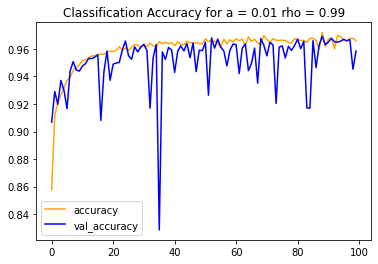

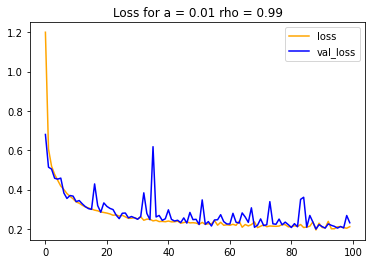

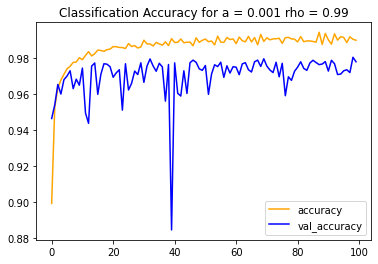

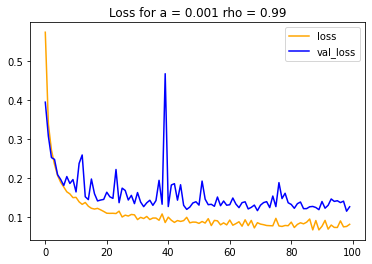

In [ ]:
# l2 reguralizer


# for different batch sizes
epochs = 100
Ntrain = Xtrain.shape[0]
batch_size = [256,Ntrain]

l2_reg = [0.1, 0.01, 0.001] # l2 regularization parameter a 

# for batch_size in batch_size:
#   # define the model
#   for a in l2_reg:
#     model = Sequential()
#     model.add(Flatten(input_shape=(28, 28)))
#     model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(a))) # hidden layer 1 fully connected
#     model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(a))) # hidden layer 2 fully connected
#     model.add(Dense(10, activation='softmax')) # output layer
#     model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
#     history = model.fit(xtrain,ytrain_onehot, batch_size = batch_size, epochs = 100, validation_data = (Xvalid,yvalid_onehot)) 
#     plt.figure() 
#     plt.title("Classification Accuracy for a = "+str(a)+" batch size = "+str(batch_size)+"")
#     plt.plot(history.history['accuracy'],color='orange',label='train')
#     plt.plot(history.history['val_accuracy'],color='blue',label='validation')
#     plt.legend(['accuracy', 'val_accuracy'])
#     plt.figure()
#     plt.title("Loss for a = "+str(a)+" batch size = "+str(batch_size)+"")
#     plt.plot(history.history['loss'],color='orange',label='train')
#     plt.plot(history.history['val_loss'],color='blue',label='validation')
#     plt.legend(['loss', 'val_loss'])


# for different rho in RMSProp
epochs = 100
rho = [0.01, 0.99]
l2_reg = [0.1, 0.01, 0.001] # l2 regularization parameter a 

for r in rho:
  # define the model
  for a in l2_reg:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(a))) # hidden layer 1 fully connected
    model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(a))) # hidden layer 2 fully connected
    model.add(Dense(10, activation='softmax')) # output layer
    opt = keras.optimizers.RMSprop(learning_rate=0.001, rho = r)
    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer = opt, metrics=['accuracy'])
    history = model.fit(xtrain,ytrain_onehot, batch_size = 256, epochs = 100, validation_data = (Xvalid,yvalid_onehot)) 
    plt.figure() 
    plt.title("Classification Accuracy for a = "+str(a)+" rho = "+str(r)+"")
    plt.plot(history.history['accuracy'],color='orange',label='train')
    plt.plot(history.history['val_accuracy'],color='blue',label='validation')
    plt.legend(['accuracy', 'val_accuracy'])
    plt.figure()
    plt.title("Loss for a = "+str(a)+" rho = "+str(r)+"")
    plt.plot(history.history['loss'],color='orange',label='train')
    plt.plot(history.history['val_loss'],color='blue',label='validation')
    plt.legend(['loss', 'val_loss'])


In [ ]:
# train with SGD optimizer 
# nn have a initialization of weights by a normal distribution with mean = 10
# we also have L2 regularization that applies penalties on layer parameters during optimization. 
# These penalties are summed into the loss function that the network optimizes.

l2_reg = [0.1, 0.01, 0.001] # l2 regularization parameter a 

# define the model
for a in l2_reg:
  model4 = Sequential()
  model4.add(Flatten(input_shape=(28, 28)))
  model4.add(Dense(128, activation='relu',
                kernel_initializer=keras.initializers.RandomNormal(mean=10),
                kernel_regularizer=keras.regularizers.l2(a))) # hidden layer 1 fully connected
  model4.add(Dense(256, activation='relu',
                  kernel_initializer=keras.initializers.RandomNormal(mean=10),
                  kernel_regularizer=keras.regularizers.l2(a))) # hidden layer 2 fully connected
  model4.add(Dense(10, activation='softmax',kernel_initializer=keras.initializers.RandomNormal(mean=10))) # output layer
  model4.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer = keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
  history4 = model4.fit(xtrain,ytrain_onehot, batch_size = 256, epochs = 100, validation_data = (Xvalid,yvalid_onehot)) 
  plt.figure() 
  plt.title('Classification Accuracy')
  plt.plot(history4.history['accuracy'],color='orange',label='train')
  plt.plot(history4.history['val_accuracy'],color='blue',label='validation')
  plt.legend(['accuracy', 'val_accuracy'])
  plt.figure()
  plt.title('Loss')
  plt.plot(history4.history['loss'],color='orange',label='train')
  plt.plot(history4.history['val_loss'],color='blue',label='validation')
  plt.legend(['loss', 'val_loss'])

In [ ]:
# train with SGD optimizer 
# we have L2 regularization that applies penalties on layer parameters during optimization. 
# These penalties are summed into the loss function that the network optimizes.

l2_reg = [0.1, 0.01, 0.001] # l2 regularization parameter a 

# define the model
for a in l2_reg:
  model6 = Sequential()
  model6.add(Flatten(input_shape=(28, 28)))
  model6.add(Dense(128, activation='relu',
                kernel_regularizer=keras.regularizers.l2(a))) # hidden layer 1 fully connected
  model6.add(Dense(256, activation='relu',
                  kernel_regularizer=keras.regularizers.l2(a))) # hidden layer 2 fully connected
  model6.add(Dense(10, activation='softmax')) # output layer
  model6.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer = keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
  history6 = model6.fit(xtrain,ytrain_onehot, batch_size = 256, epochs = 100, validation_data = (Xvalid,yvalid_onehot)) 
  plt.figure() 
  plt.title('Classification Accuracy')
  plt.plot(history6.history['accuracy'],color='orange',label='train')
  plt.plot(history6.history['val_accuracy'],color='blue',label='validation')
  plt.legend(['accuracy', 'val_accuracy'])
  plt.figure()
  plt.title('Loss')
  plt.plot(history6.history['loss'],color='orange',label='train')
  plt.plot(history6.history['val_loss'],color='blue',label='validation')
  plt.legend(['loss', 'val_loss'])

In [ ]:
# L1 regularization and Dropout
# with propability of 30 % neurons in hidden layers are drop out, outputs of drop out neurons set to 0

# define the model
model5 = Sequential()
model5.add(Flatten(input_shape=(28, 28)))
model5.add(Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01))) # hidden layer 1 fully connected
model5.add(Dropout(0.3))
model5.add(Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l1(0.01))) # hidden layer 2 fully connected
model5.add(Dropout(0.3))                 
model5.add(Dense(10, activation='softmax',kernel_regularizer=keras.regularizers.l1(0.01))) # output layer
model5.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history5 = model5.fit(xtrain,ytrain_onehot, batch_size = 256, epochs = 100, validation_data = (Xvalid,yvalid_onehot)) 
plt.figure() 
plt.title('Classification Accuracy')
plt.plot(history5.history['accuracy'],color='blue',label='train')
plt.plot(history5.history['val_accuracy'],color='orange',label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.figure()
plt.title('Loss')
plt.plot(history5.history['loss'],color='blue',label='train')
plt.plot(history5.history['val_loss'],color='orange',label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
